# OPENING A DISTRIBUTION CENTER FOR RESTAURANTS IN BARCELONA

This Capstone Project consists in scraping a Wikipedia Page to get the necessary information, using Google API to get Longitudes and Latitudes of the different Neighborhoods in Barcelona, using Foursquare API to get the nearby venues of each of the neighborhoods, using K-means clustering to the neighboods, analizing each cluster in order to identify the one that has as most common venue Hotels, Bars and restaurants meaning that tourist frequent the area. Identifying the best Neighborhood from this cluster and finally finding the centroid among the venues to use as the location for the Distribution Center.

#   BUSINESS PROBLEM

Barcelona, located in north-eastern Spain and on the shores of the Mediterranean, is one of the principal European cities.

Given it's location, Barcelona is rich in food and cuisine culture, with the Mediterranean Diet as a key driver.
Barcelona offers a number of different elements that make it an attractive place to do business. Today the city is a highly interesting location for new economic activities.

For that reason we are evaluating which could be the perfect location to open a Distribution Center for Restaurants.




# DATA

The data that will be used in this project was found in:

https://es.wikipedia.org/wiki/Distritos_de_Barcelona

Google API Geocode

Foursquare API

Sklearn Kmeans Clustering

Import the necessary Libraries

In [2]:
!pip install wikitables
from wikitables import import_tables
import numpy as np; # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
!pip install geopy
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage;
from sklearn.cluster import KMeans
#Import folium
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
!pip install wikipedia
import wikipedia as wp

print('Libraries imported.')

Requirement not upgraded as not directly required: wikitables in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: requests>=2.9.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wikitables)
Requirement not upgraded as not directly required: mwparserfromhell>=0.4.3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wikitables)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests>=2.9.1->wikitables)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests>=2.9.1->wikitables)
Requirement not upgraded as not directly required: urllib3<1.23,>=1.21.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests>=2.9.1->wikitables)
Requirement not upgraded as not directly required: certifi>=2017.4.17 in /opt/conda

Obtaing the HTML of the wikipedia page using BeautifulSoup

In [3]:
from bs4 import BeautifulSoup
website_url = requests.get('https://es.wikipedia.org/wiki/Distritos_de_Barcelona').text
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   Distritos de Barcelona - Wikipedia, la enciclopedia libre
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Distritos_de_Barcelona","wgTitle":"Distritos de Barcelona","wgCurRevisionId":105383948,"wgRevisionId":105383948,"wgArticleId":281671,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Distritos de Barcelona"],"wgBreakFrames":false,"wgPageContentLanguage":"es","wgPageContentModel":"wikitext","wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","m

Find the table in the Wikipedia Page and extract the necessary data. From this table we need the name of the 'Barrios' (Neighborhoods) from Barcelona

Screen Shot 2018-08-13 at 12.26.44 AM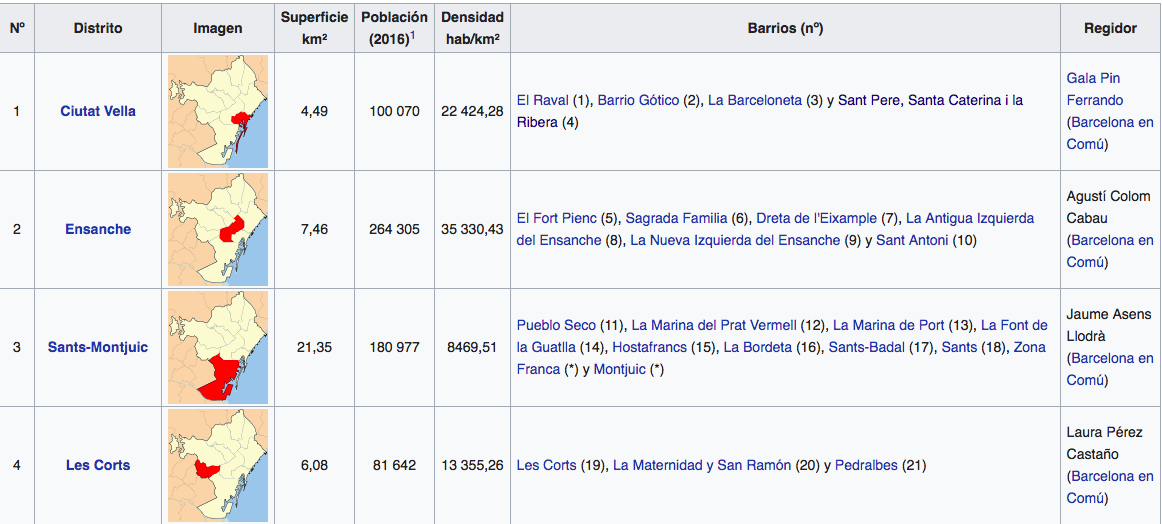

In [4]:
My_table = soup.find('table')
links = My_table.findAll('a')
Texts = []
for link in links:
    Texts.append(link.get('title'))
Districts = []
Districts.append(Texts[3:7])
Districts.append(Texts[11:17])
Districts.append(Texts[20:30])
Districts.append(Texts[33:36])
Districts.append(Texts[39:45])
Districts.append(Texts[49:54])
Districts.append(Texts[57:68])
Districts.append(Texts[71:84])
Districts.append(Texts[87:94])
Districts.append(Texts[98:108])
df=pd.DataFrame(Texts[3:7])
df2=pd.DataFrame(Texts[11:17])
df3=pd.DataFrame(Texts[20:30])
df4=pd.DataFrame(Texts[33:36])
df5=pd.DataFrame(Texts[39:45])
df6=pd.DataFrame(Texts[49:54])
df7=pd.DataFrame(Texts[57:68])
df8=pd.DataFrame(Texts[71:84])
df9=pd.DataFrame(Texts[87:94])
df10=pd.DataFrame(Texts[98:108])
frames=[df,df2,df3,df4,df5,df6,df7,df8,df9,df10]
result=pd.concat(frames,ignore_index=True)

For using the Google API you'll need a API Key which for this this project will remain hidden

In [5]:
# The code was removed by Watson Studio for sharing.

For some of the neighborhoods in Barcelona, geocode was not able to get their coordinates, so we drop those neighborhhods from the DataFrame

In [43]:
prueba=result
prueba1=prueba.drop([3,10,13,17,22,25,28,43,50,51,57,62,63,55,59])
Barcelona=prueba1.reset_index(drop=True)
Barcelona=Barcelona.drop([31])
Barcelona=Barcelona.reset_index(drop=True)
Barcelona=Barcelona.drop([34])
Barcelona=Barcelona.reset_index(drop=True)
Barcelona=Barcelona.drop([17])
Barcelona=Barcelona.reset_index(drop=True)
Barcelona=Barcelona.drop([37])
Barcelona=Barcelona.reset_index(drop=True)
Barcelona=Barcelona.drop([18])
Barcelona=Barcelona.reset_index(drop=True)
Barcelona=Barcelona.drop([17])
Barcelona=Barcelona.reset_index(drop=True)
Barcelona

,0
0,El Raval
1,Barrio Gótico de Barcelona
2,La Barceloneta
3,Fort Pienc
4,Barrio de la Sagrada Familia (Barcelona)
5,Dreta de l'Eixample
6,La Antigua Izquierda del Ensanche
7,La Nueva Izquierda del Ensanche
8,Barrio de Sant Antoni (Barcelona)
9,La Marina del Prat Vermell


Using a for loop and geocode we obtain the coordinates of the remaining Neighborhoods

In [44]:
Latitude=[]
Longitude=[]
for x in range(0,54):
    Location=Barcelona.loc[x]
    url = 'https://maps.googleapis.com/maps/api/geocode/json?key={}&address={}'.format(API_key, Location)
    response = requests.get(url).json()
    #print(response)
    geographical_data = response['results'][0]['geometry']['location']
    Latitude.append(geographical_data['lat'])
    Longitude.append(geographical_data['lng'])
Barcelona['Latitude']=Latitude
Barcelona['Longitude']=Longitude
Barcelona.rename(columns={0: "Neighborhood"}, inplace=True)
Barcelona

,Neighborhood,Latitude,Longitude
0,El Raval,41.379716,2.168184
1,Barrio Gótico de Barcelona,41.381906,2.178185
2,La Barceloneta,41.380894,2.189385
3,Fort Pienc,41.398110,2.181871
4,Barrio de la Sagrada Familia (Barcelona),41.403630,2.174356
5,Dreta de l'Eixample,41.391843,2.164197
6,La Antigua Izquierda del Ensanche,41.388557,2.157303
7,La Nueva Izquierda del Ensanche,41.383733,2.147480
8,Barrio de Sant Antoni (Barcelona),41.377266,2.158531
9,La Marina del Prat Vermell,41.352538,2.141341


We now visualize using Folium the neighborhoods in Barcelona

In [45]:
address = 'Barcelona'
geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitudes = location.latitude
longitudes = location.longitude
# create map of Barcelona using latitude and longitude values
map_Barcelona = folium.Map(location=[latitudes, longitudes], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(Barcelona['Latitude'], Barcelona['Longitude'], Barcelona['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Barcelona)  
    
map_Barcelona

As we can see there is a particular neighborhoods that seems to be very far from the rest of the neighborhoods in Barcelona. But for now, this won't affect us

For using the Foursquare API, we need a client ID and a client secret, in this project this information will be hidden

In [9]:
# The code was removed by Watson Studio for sharing.

Using the function used in the previous lab, we will be able to obtain the nearby venues of the neighborhoods

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=850):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

We'll limit the radius to 850 meter, in order to obtain more venues per neighborhood

In [46]:
LIMIT = 100
radius = 850
Barcelona_venues = getNearbyVenues(names=Barcelona['Neighborhood'],
                                   latitudes=Barcelona['Latitude'],
                                   longitudes=Barcelona['Longitude']
                                  )

El Raval
Barrio Gótico de Barcelona
La Barceloneta
Fort Pienc
Barrio de la Sagrada Familia (Barcelona)
Dreta de l'Eixample
La Antigua Izquierda del Ensanche
La Nueva Izquierda del Ensanche
Barrio de Sant Antoni (Barcelona)
La Marina del Prat Vermell
La Marina de Port
Hostafrancs
La Bordeta
Sants-Badal
Zona Franca (Barcelona)
Montjuic (Barcelona)
Barrio de Les Corts
Sant Gervasi-Bonanova
Sant Gervasi-Galvany
Vallcarca y los Penitentes
El Coll
La Salud (Barcelona)
Villa de Gracia
Camp d'en Grassot i Gràcia Nova
Baix Guinardó
Can Baró
El Guinardó
La Font d'en Fargues
La Teixonera
Sant Genís dels Agudells
Montbau
Horta (Barcelona)
Vilapicina y La Torre Llobeta
Porta (Barcelona)
Turó de la Peira
La Guineueta
Verdún (Barcelona)
La Prosperitat
La Trinitat Nova
Ciudad Meridiana
La Trinitat Vella
El Buen Pastor (Barcelona)
San Andrés de Palomar
Navas (barrio)
El Campo del Arpa del Clot
El Clot
El Parc i la Llacuna del Poblenou
La Vila Olímpica del Poblenou
Pueblo Nuevo (Barcelona)
Diagonal Mar 

In [14]:
Barcelona_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,El Raval,41.379716,2.168184,Cera 23,41.378947,2.166180,Spanish Restaurant
1,El Raval,41.379716,2.168184,Chulapio,41.379264,2.165905,Cocktail Bar
2,El Raval,41.379716,2.168184,Arume,41.378953,2.166008,Spanish Restaurant
3,El Raval,41.379716,2.168184,La Robadora,41.379500,2.170463,Gastropub
4,El Raval,41.379716,2.168184,A Tu Bola,41.380096,2.169054,Tapas Restaurant


Since we are going to cluster the Neighborhoods according to the Venue Category and this is a Categorical variable, we'll need to use one hot encoder, to make dummy variables.

In [50]:
# one hot encoding
Barcelona_onehot = pd.get_dummies(Barcelona_venues[['Venue Category']], prefix="", prefix_sep="")


# add neighborhood column back to dataframe
Barcelona_onehot['Neighborhood'] = Barcelona_venues['Neighborhood'] 


Barcelona_onehot.head()

,Accessories Store,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Restaurant,Road,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Transportation Service,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [51]:
# move neighborhood column to the first column
colnames = Barcelona_onehot.columns.tolist()
print(colnames.index('Neighborhood'))
fixed_columns = [Barcelona_onehot.columns[180]] + list(Barcelona_onehot.columns[:180])
Barcelona_onehot = Barcelona_onehot[fixed_columns]
Barcelona_onehot.head()

180


,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue
0,El Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,El Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,El Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,El Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

We then groupby the data to get the frequency of each venue category in every neighborhood

In [52]:
Barcelona_grouped = Barcelona_onehot.groupby('Neighborhood').mean().reset_index()
Barcelona_grouped.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue
0,Baix Guinardó,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.05,0.07,0.0,0.0,0.0,0.0,0.0,0.00,0.01,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.01,0.00,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.04,0.01,0.00,0.00,0.0,0.00,0.02,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.02,0.0,0.02,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.02,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.05,0.03,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.01,0.00,0.0,0.0,0.00,0.00,0.03,0.00,0.0,0.00,0.0,0.02,0.00,0.01,0.0,0.0,0.00,0.03,0.05,0.00,0.0,0.0,0.0,0.0,0.02,0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.03,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0
1,Barrio Gótico de Barcelona,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.06,0.0,0.0,0.0,0.0,0.0,0.01,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.01,0.02,0.0,0.00,0.00,0.0,0.00,0.01,0.0,0.0,0.05,0.05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.01,0.0,0.03,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.0,0.00,0.0,0.00,0.00,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.01,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.01,0.01,0.0,0.0,0.00,0.01,0.0

In [53]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now we can now which are the most common venues in every neighborhood

In [54]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Barcelona_grouped['Neighborhood']

for ind in np.arange(Barcelona_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Barcelona_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baix Guinardó,Bar,Bakery,Grocery Store,Japanese Restaurant,Café,Gym,Italian Restaurant,Mediterranean Restaurant,Hotel,Dessert Shop
1,Barrio Gótico de Barcelona,Hotel,Italian Restaurant,Bar,Coffee Shop,Cocktail Bar,Ice Cream Shop,Dessert Shop,Falafel Restaurant,Candy Store,Mediterranean Restaurant
2,Barrio de Les Corts,Café,Coffee Shop,Hotel,Cocktail Bar,Asian Restaurant,Italian Restaurant,Japanese Restaurant,Gym / Fitness Center,Bakery,Mediterranean Restaurant
3,Barrio de Sant Antoni (Barcelona),Mediterranean Restaurant,Café,Bar,Cocktail Bar,Coffee Shop,Hotel,Argentinian Restaurant,Japanese Restaurant,Italian Restaurant,Mexican Restaurant
4,Barrio de la Sagrada Familia (Barcelona),Italian Restaurant,Café,Bar,Japanese Restaurant,Hotel,Gym,Mediterranean Restaurant,Burger Joint,Coffee Shop,Asian Restaurant
5,Camp d'en Grassot i Gràcia Nova,Mediterranean Restaurant,Bar,Hostel,Japanese Restaurant,Café,Farmers Market,Indie Movie Theater,Italian Restaurant,Hotel,Gym
6,Can Baró,Gym,Café,Grocery Store,Dessert Shop,Breakfast Spot,Bar,Italian Restaurant,College Gym,Chinese Restaurant,Fried Chicken Joint
7,Ciudad Meridiana,Metro Station,Grocery Store,Café,Mediterranean Restaurant,Church,Comedy Club,College Gym,Coffee Shop,Cocktail Bar,Clothing Store
8,Diagonal Mar i Front Marítim del Poblenou,Mediterranean Restaurant,Hotel,Café,Italian Restaurant,Clothing Store,Coffee Shop,Ice Cream Shop,Juice Bar,Burger Joint,Bakery
9,Dreta de l'Eixample,Hotel,Boutique,Mediterranean Restaurant,Hostel,Bookstore,Japanese Restaurant,Cocktail Bar,Café,Furniture / Home Store,Clothing Store


In [55]:
Barcelona_grouped_clustering = Barcelona_grouped.drop('Neighborhood', 1)

With this information, we can now begin to cluster the neighborhoods using first K-means

To figure out how many cluster we will use. First we will build a dendogram and analize it

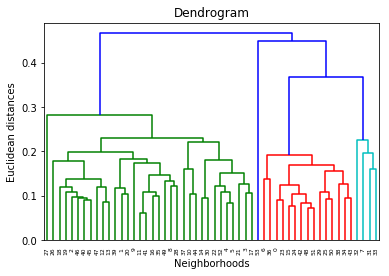

In [56]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(Barcelona_grouped_clustering, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Neighborhoods')
plt.ylabel('Euclidean distances')
plt.show()

From the Dendogram we need to find the longest vertical distance that wont be intercepted if we extend all the horizontal lines

Then we intercept all the vertical lines that are right below of the horizontal line that connects to this vertical line and we can count 3 clusters. So we set the number of clusters to 3

In [57]:
# set number of clusters

kclusters = 3

Barcelona_grouped_clustering = Barcelona_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters).fit(Barcelona_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 2], dtype=int32)

In [58]:
Barcelona_merged = Barcelona
# add clustering labels
Barcelona_merged['Cluster Labels'] = kmeans.labels_
#merge Barcelona_grouped with Barcelona_data to add latitude/longitude for each neighborhood
#Barcelona_merged = Barcelona_merged.join(neighborhoods_venues_sorted)
Barcelona_merged.sort_values('Neighborhood',ascending=True,inplace=True)
Barcelona_merged=Barcelona_merged.reset_index(drop=True)
Barcelona_merged = Barcelona_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Barcelona_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baix Guinardó,41.412131,2.168357,1,Bar,Bakery,Grocery Store,Japanese Restaurant,Café,Gym,Italian Restaurant,Mediterranean Restaurant,Hotel,Dessert Shop
1,Barrio Gótico de Barcelona,41.381906,2.178185,0,Hotel,Italian Restaurant,Bar,Coffee Shop,Cocktail Bar,Ice Cream Shop,Dessert Shop,Falafel Restaurant,Candy Store,Mediterranean Restaurant
2,Barrio de Les Corts,41.389013,2.132749,0,Café,Coffee Shop,Hotel,Cocktail Bar,Asian Restaurant,Italian Restaurant,Japanese Restaurant,Gym / Fitness Center,Bakery,Mediterranean Restaurant
3,Barrio de Sant Antoni (Barcelona),41.377266,2.158531,0,Mediterranean Restaurant,Café,Bar,Cocktail Bar,Coffee Shop,Hotel,Argentinian Restaurant,Japanese Restaurant,Italian Restaurant,Mexican Restaurant
4,Barrio de la Sagrada Familia (Barcelona),41.403630,2.174356,0,Italian Restaurant,Café,Bar,Japanese Restaurant,Hotel,Gym,Mediterranean Restaurant,Burger Joint,Coffee Shop,Asian Restaurant


Visualize using Folium the clusters

In [59]:
# create map
map_Kmeans_clusters = folium.Map(location=[latitudes, longitudes], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Barcelona_merged['Latitude'], Barcelona_merged['Longitude'], Barcelona_merged['Neighborhood'], Barcelona_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_Kmeans_clusters)
       
map_Kmeans_clusters

We now analize each cluster


In [60]:
Cluster_0=Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 0, Barcelona_merged.columns[[0] + list(range(1, Barcelona_merged.shape[1]))]]
Cluster_1=Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 1, Barcelona_merged.columns[[0] + list(range(1, Barcelona_merged.shape[1]))]]
Cluster_2=Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 2, Barcelona_merged.columns[[0] + list(range(1, Barcelona_merged.shape[1]))]]


In [64]:
Cluster_0

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barrio Gótico de Barcelona,41.381906,2.178185,0,Hotel,Italian Restaurant,Bar,Coffee Shop,Cocktail Bar,Ice Cream Shop,Dessert Shop,Falafel Restaurant,Candy Store,Mediterranean Restaurant
2,Barrio de Les Corts,41.389013,2.132749,0,Café,Coffee Shop,Hotel,Cocktail Bar,Asian Restaurant,Italian Restaurant,Japanese Restaurant,Gym / Fitness Center,Bakery,Mediterranean Restaurant
3,Barrio de Sant Antoni (Barcelona),41.377266,2.158531,0,Mediterranean Restaurant,Café,Bar,Cocktail Bar,Coffee Shop,Hotel,Argentinian Restaurant,Japanese Restaurant,Italian Restaurant,Mexican Restaurant
4,Barrio de la Sagrada Familia (Barcelona),41.403630,2.174356,0,Italian Restaurant,Café,Bar,Japanese Restaurant,Hotel,Gym,Mediterranean Restaurant,Burger Joint,Coffee Shop,Asian Restaurant
7,Ciudad Meridiana,41.462024,2.175728,0,Metro Station,Grocery Store,Café,Mediterranean Restaurant,Church,Comedy Club,College Gym,Coffee Shop,Cocktail Bar,Clothing Store
8,Diagonal Mar i Front Marítim del Poblenou,41.407467,2.216288,0,Mediterranean Restaurant,Hotel,Café,Italian Restaurant,Clothing Store,Coffee Shop,Ice Cream Shop,Juice Bar,Burger Joint,Bakery
9,Dreta de l'Eixample,41.391843,2.164197,0,Hotel,Boutique,Mediterranean Restaurant,Hostel,Bookstore,Japanese Restaurant,Cocktail Bar,Café,Furniture / Home Store,Clothing Store
11,El Buen Pastor (Barcelona),41.394243,2.201473,0,Mediterranean Restaurant,Hotel,Beach Bar,Café,Bar,Bakery,Italian Restaurant,Gastropub,Hostel,Argentinian Restaurant
12,El Campo del Arpa del Clot,41.411853,2.183100,0,Hotel,Bakery,Bar,Café,Italian Restaurant,Korean Restaurant,Gym / Fitness Center,Gastropub,Hostel,Japanese Restaurant
13,El Clot,41.409704,2.189237,0,Hotel,Mediterranean Restaurant,Gym / Fitness Center,Italian Restaurant,Japanese Restaurant,Cocktail Bar,Grocery Store,Bakery,Coffee Shop,Café


In [63]:
Cluster_1

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baix Guinardó,41.412131,2.168357,1,Bar,Bakery,Grocery Store,Japanese Restaurant,Café,Gym,Italian Restaurant,Mediterranean Restaurant,Hotel,Dessert Shop
5,Camp d'en Grassot i Gràcia Nova,41.404668,2.165900,1,Mediterranean Restaurant,Bar,Hostel,Japanese Restaurant,Café,Farmers Market,Indie Movie Theater,Italian Restaurant,Hotel,Gym
6,Can Baró,41.417228,2.163444,1,Gym,Café,Grocery Store,Dessert Shop,Breakfast Spot,Bar,Italian Restaurant,College Gym,Chinese Restaurant,Fried Chicken Joint
10,El Besós y el Maresme,41.594479,2.480199,1,Music Venue,Concert Hall,Comfort Food Restaurant,Comedy Club,College Gym,Coffee Shop,Cocktail Bar,Clothing Store,Climbing Gym,Circus
17,El Raval,41.379716,2.168184,1,Cocktail Bar,Bar,Mediterranean Restaurant,Bookstore,Hotel,Japanese Restaurant,Donut Shop,Movie Theater,Indian Restaurant,Monument / Landmark
19,Horta (Barcelona),41.433303,2.155286,1,Café,Mediterranean Restaurant,Hostel,Coffee Shop,Chinese Restaurant,Bakery,Food & Drink Shop,Grocery Store,Burger Joint,Deli / Bodega
21,La Antigua Izquierda del Ensanche,41.388557,2.157303,1,Mediterranean Restaurant,Cocktail Bar,Japanese Restaurant,Hotel,Café,Beer Bar,Burger Joint,Breakfast Spot,Bistro,Ice Cream Shop
32,La Trinitat Nova,41.451836,2.185557,1,Grocery Store,Music Venue,Breakfast Spot,Metro Station,Church,Comedy Club,College Gym,Coffee Shop,Cocktail Bar,Clothing Store
37,Montjuic (Barcelona),41.364000,2.167493,1,Boat or Ferry,Mediterranean Restaurant,Hotel,Italian Restaurant,Light Rail Station,Lighthouse,Indie Movie Theater,BBQ Joint,Beer Garden,Castle
38,Navas (barrio),41.416765,2.188015,1,Grocery Store,Bakery,Café,Hotel,Cocktail Bar,Coffee Shop,Gym / Fitness Center,Chinese Restaurant,Farmers Market,Bar


In [65]:
Cluster_2

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,La Nueva Izquierda del Ensanche,41.383733,2.147480,2,Hotel,Japanese Restaurant,Mediterranean Restaurant,Café,Indian Restaurant,Burger Joint,Coffee Shop,Italian Restaurant,Gym,Korean Restaurant
34,La Verneda y la Paz,41.423992,2.202764,2,Coffee Shop,Grocery Store,Bakery,Mediterranean Restaurant,Café,Chinese Restaurant,Metro Station,Japanese Restaurant,Bar,Burger Joint
39,Porta (Barcelona),41.385064,2.173404,2,Hotel,Ice Cream Shop,Japanese Restaurant,Coffee Shop,Dessert Shop,Italian Restaurant,Café,Mediterranean Restaurant,Market,Donut Shop


As we can see the First cluster is the one that contains the neighborhoods that have restaurants and more important Mediterranean Restaurants

In [66]:
Cluster_0.drop('Cluster Labels',axis=1,inplace=True) 

This are the neighborhoods in which we will be deciding where to open the new Distribution Center

In [68]:
Neighborhoods_final=Cluster_0.iloc[:,0:3]
Neighborhoods_final

,Neighborhood,Latitude,Longitude
1,Barrio Gótico de Barcelona,41.381906,2.178185
2,Barrio de Les Corts,41.389013,2.132749
3,Barrio de Sant Antoni (Barcelona),41.377266,2.158531
4,Barrio de la Sagrada Familia (Barcelona),41.403630,2.174356
7,Ciudad Meridiana,41.462024,2.175728
8,Diagonal Mar i Front Marítim del Poblenou,41.407467,2.216288
9,Dreta de l'Eixample,41.391843,2.164197
11,El Buen Pastor (Barcelona),41.394243,2.201473
12,El Campo del Arpa del Clot,41.411853,2.183100
13,El Clot,41.409704,2.189237


We'll get again the nearby venues but now only for this restaurants

In [69]:
LIMIT = 100
radius = 850
Cluster_0_venues=getNearbyVenues(names=Neighborhoods_final['Neighborhood'],
                                   latitudes=Neighborhoods_final['Latitude'],
                                   longitudes=Neighborhoods_final['Longitude']
                                  )


Barrio Gótico de Barcelona
Barrio de Les Corts
Barrio de Sant Antoni (Barcelona)
Barrio de la Sagrada Familia (Barcelona)
Ciudad Meridiana
Diagonal Mar i Front Marítim del Poblenou
Dreta de l'Eixample
El Buen Pastor (Barcelona)
El Campo del Arpa del Clot
El Clot
El Coll
El Guinardó
El Parc i la Llacuna del Poblenou
Fort Pienc
Hostafrancs
La Barceloneta
La Bordeta
La Font d'en Fargues
La Guineueta
La Marina de Port
La Marina del Prat Vermell
La Prosperitat
La Salud (Barcelona)
La Teixonera
La Trinitat Vella
La Vila Olímpica del Poblenou
Montbau
San Martín de Provensals
Sant Gervasi-Bonanova
Sant Gervasi-Galvany
Sants-Badal
Villa de Gracia
Zona Franca (Barcelona)


In [71]:
Cluster_0_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barrio Gótico de Barcelona,41.381906,2.178185,Gelaaati! di Marco,41.383186,2.177369,Ice Cream Shop
1,Barrio Gótico de Barcelona,41.381906,2.178185,Barrio Gótico,41.383660,2.177290,Neighborhood
2,Barrio Gótico de Barcelona,41.381906,2.178185,Plaça de Sant Jaume,41.382691,2.177044,Plaza
3,Barrio Gótico de Barcelona,41.381906,2.178185,El Cuiner de Damasc,41.381490,2.177677,Falafel Restaurant
4,Barrio Gótico de Barcelona,41.381906,2.178185,Milk Bar & Bistro,41.381426,2.180209,Bar


Now we'll only keep the data of the mediterranean venues

In [76]:
Med=Cluster_0_venues[Cluster_0_venues['Venue Category'].str.contains("Restaurant")]

Using the groupby we are going to count which neighborhood has more mediterranean restaurants

In [77]:
Med.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barrio Gótico de Barcelona,35,35,35,35,35,35
Barrio de Les Corts,38,38,38,38,38,38
Barrio de Sant Antoni (Barcelona),46,46,46,46,46,46
Barrio de la Sagrada Familia (Barcelona),34,34,34,34,34,34
Ciudad Meridiana,1,1,1,1,1,1
Diagonal Mar i Front Marítim del Poblenou,33,33,33,33,33,33
Dreta de l'Eixample,25,25,25,25,25,25
El Buen Pastor (Barcelona),37,37,37,37,37,37
El Campo del Arpa del Clot,38,38,38,38,38,38


We notice that the neighborhoods that we are going to select is 'La Barceloneta'

In [78]:
Barceloneta=Med[Med['Neighborhood'].str.contains("Barceloneta")]
Barceloneta

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1336,La Barceloneta,41.380894,2.189385,Somorrostro,41.379156,2.189100,Spanish Restaurant
1337,La Barceloneta,41.380894,2.189385,La Cova Fumada,41.379254,2.189254,Tapas Restaurant
1338,La Barceloneta,41.380894,2.189385,Bitácora,41.382070,2.187608,Tapas Restaurant
1339,La Barceloneta,41.380894,2.189385,Buon Appetito,41.381092,2.190155,Italian Restaurant
1343,La Barceloneta,41.380894,2.189385,Rumbanroll,41.380597,2.187807,Mediterranean Restaurant
1344,La Barceloneta,41.380894,2.189385,La Bombeta,41.380521,2.187573,Tapas Restaurant
1345,La Barceloneta,41.380894,2.189385,Jai-Ca,41.381501,2.187858,Tapas Restaurant
1346,La Barceloneta,41.380894,2.189385,Cal Papi,41.379219,2.190034,Mediterranean Restaurant
1347,La Barceloneta,41.380894,2.189385,Can Maño,41.381165,2.188437,Mediterranean Restaurant
1348,La Barceloneta,41.380894,2.189385,Bar Electricitat,41.379362,2.189932,Tapas Restaurant


To select the exact location of our Distribution Center, we'll find the mean of all 10 venue coordinates, so in that way our distribution center is on average close to each of the restaurants

In [80]:
Location = Barceloneta.groupby('Neighborhood').mean().reset_index()
Loc_Lat=Location.loc[0][3]
Loc_Long=Location.loc[0][4]

In [81]:
Location_map = folium.Map(location=[Loc_Lat, Loc_Long], zoom_start=15) 


# add Locationas a red circle mark
folium.features.CircleMarker(
    [Loc_Lat, Loc_Long],
    radius=10,
    popup='Distribution Center',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(Location_map)

for lat, lng, venue in zip(Barceloneta['Venue Latitude'], Barceloneta['Venue Longitude'], Barceloneta['Venue']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Location_map)  
Location_map

Using Folium we can visualize our Distribution Center (Red Circle) from the 56  Restaurants in La Barceloneta